In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.
['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


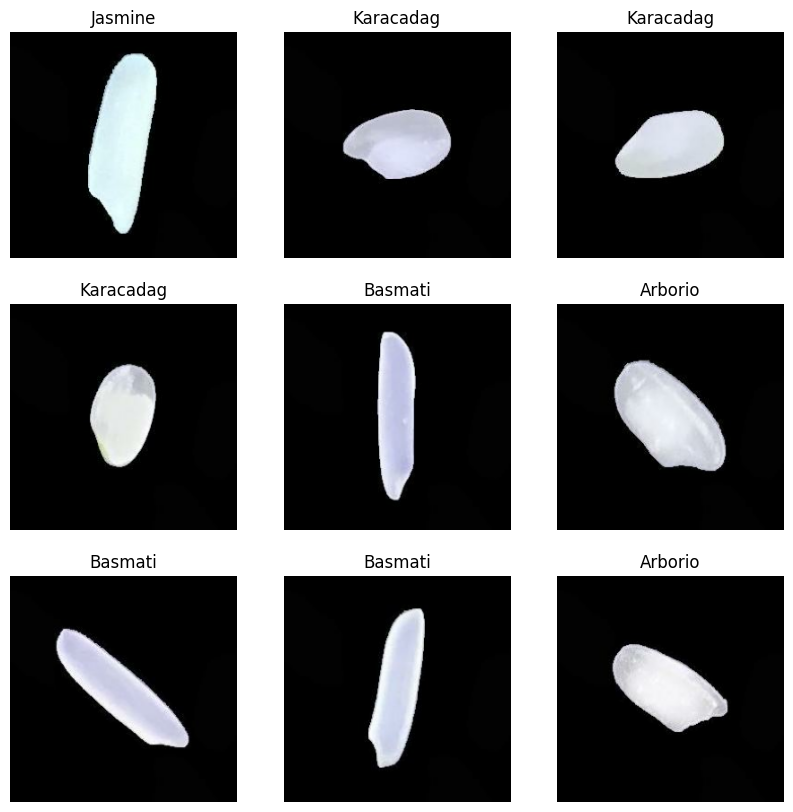

In [6]:
# set the hyper parameters
data_dir = "..\\Rice_Image_Dataset"
img_height = 224
img_width = 224
batch_size = 32
seed = 123
# documentation on tensorflow website
train_ds  = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,# trainign percentatge
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
val_ds  = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,     # same split
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])